## Project 1 - Part 3

## Team Info 

Project Title: Credit Card Fraud Detection

Team Name: FraudBusters

Team Members: 
    Sanju Kanumuri (sanju), 
    Emanda Seifu (emandats),
    Brianna Detter (bdetter),
    Rahul Ramakrishnan (rramakrishnan106), &
    Harsha Paladugu (harshanba34)

## Project Introduction

Project topic: Digital fraud has been one of the biggest illegal markets in recent times. From black market websites selling credit card information to fishing messages trying to access your personal information, financial fraud is a big issue that currently needs to be tackled. Our project will be looking over a Kaggle database that presents different features of online transactions. This training data has a column with a boolean value of 0 or 1 telling us whether or not the transaction is fraudulent. With this information, we plan on finding trends within the data that tell us what factors most contribute to fraud.


Potential research questions you plan to address: 
What are indicators of credit card fraud attempts? 
What spending patterns that indicate fraud?  

Description of potential source data: 
"We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods."
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
https://www.kaggle.com/datasets/ealaxi/paysim1


Using the information above, we plan on plotting the data, finding a regression line, finding patterns with fraudulant and nonfrrudaulant data

## Question 
What factors contribute to a transcation being flagged as fraud? 
Moreover, how can we visualize the data to best understand the most important factors in detecting fraud?

#### Motivation:

As we have mentioned above, digital fraud has continued to increase over the past several years and can be cited as one of the ways that illegal markets/groups will target an individual's personal information. Based on the data from Kaggle, we want to find out what different aspects of online transactions that be linked to a transcation being flagged as fraud. 

#### Methods:

One way we are planning to research this is using Multi-dimensional Scaling (MDS) with a normalized data set in order to get a better understanding for the relationship between different features and what transactions are marked as fraud. In addition to this, we also plan to use other tools such as pie charts, bar graphs, etc. to provide readers with several varying visuals of the information provided by the Kaggle database.

## Analysis

### Data
The dataset on Kaggle, titled "Synthetic Financial Datasets For Fraud Detection," consists of a synthetic dataset generated by the PaySim mobile money simulator. This simulator mimics the transactional patterns of real-world financial systems at scale, primarily designed to provide data for research into fraud detection methods. The dataset includes several types of transactions, and it is labeled with indicators of fraudulent activity, making it a valuable resource for developing and testing fraud detection algorithms.

### Data Processing 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
# from geopy.distance import geodesic
# from geopy.geocoders import Nominatim

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape
df.info()
# print(len(df[df['type'].unique()]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


###  Visualization of Dataset 
We formed visualizations to detect or understand patterns within credit card fraud. By comparing the distributions of transaction amounts between fraudulent and non-fraudulent transactions, analysts can identify anomalies or patterns characteristic of fraud. Moreover, understanding the distribution of payment types assists in recognizing which channels might be more susceptible to fraud.

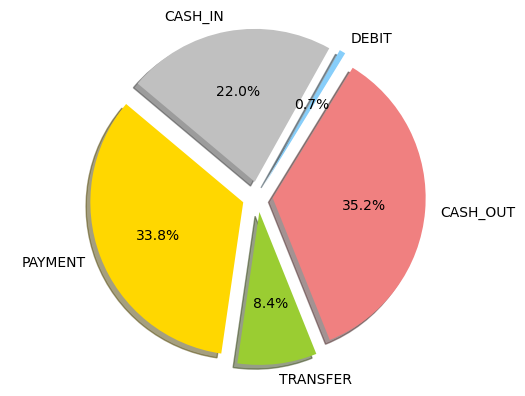

In [4]:
# Data to plot
labels = 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT' ,  "CASH_IN"
sizes = [len(df[df['type']=="PAYMENT"]), len(df[df['type']=="TRANSFER"]), len(df[df['type']=="CASH_OUT"]),  len(df[df['type']=="DEBIT"]),  len(df[df['type']=="CASH_IN"])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','silver']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

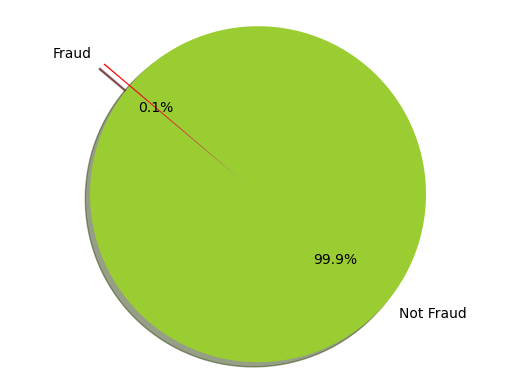

In [5]:
# Data to plot
labels_bar = 'Not Fraud', 'Fraud'
heights_bar = [len(df[df['isFraud']==0]), len(df[df['isFraud']==1])]
colors_bar = ['yellowgreen', 'red']
explode_bar = (0.1, 0.1)

# Plot
plt.pie(heights_bar, explode=explode_bar, labels=labels_bar, colors=colors_bar,
    autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

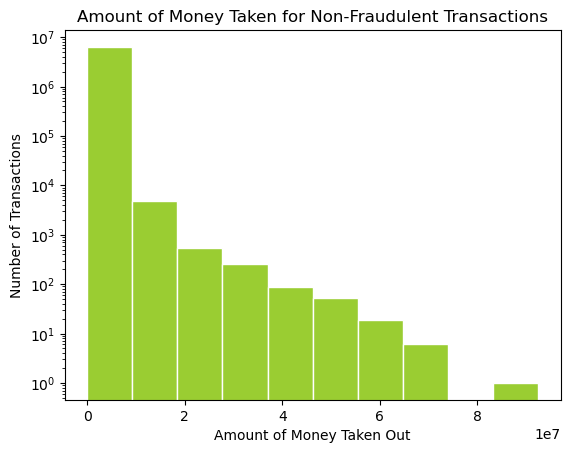

In [6]:
nonfraud_data = df[df['isFraud'] == 0]
plt.hist(nonfraud_data.amount, color='yellowgreen', edgecolor='w')
plt.yscale('log')

plt.xlabel("Amount of Money Taken Out")
plt.ylabel("Number of Transactions")
plt.title("Amount of Money Taken for Non-Fraudulent Transactions")

plt.show()

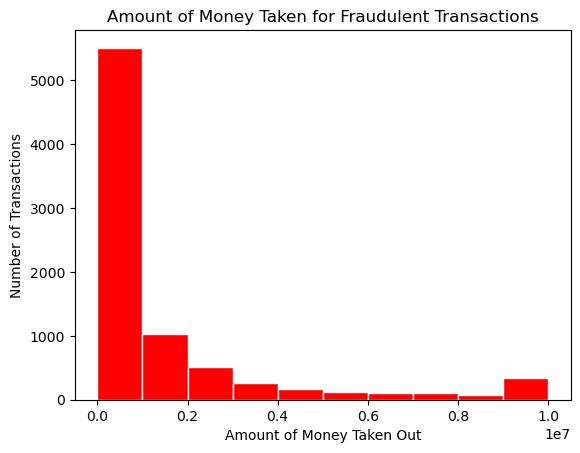

In [7]:
fraud_data = df[df['isFraud'] == 1]
plt.hist(fraud_data.amount, color='red', edgecolor='w')

plt.xlabel("Amount of Money Taken Out")
plt.ylabel("Number of Transactions")
plt.title("Amount of Money Taken for Fraudulent Transactions")

plt.show()

In [8]:
# Link to what I was looking at:
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/KNN/KNN.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# for scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

x = df.drop(['isFraud', 'isFlaggedFraud', 'type', 'nameOrig', 'nameDest'], axis = 1)
y = df['isFraud']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state = 0,
                                                    test_size = .2)

# Reduce dimension to 2 with PCA
std_clf = make_pipeline(StandardScaler(),
                        PCA(n_components=2, random_state=0),
                        KNeighborsClassifier(n_neighbors=5))

In [10]:
std_clf.fit(x_train, y_train)
pred_test_std = std_clf.predict(x_test)

In [11]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
99.87%



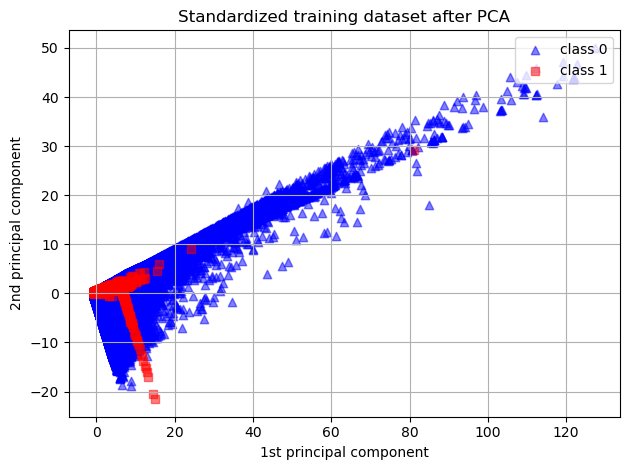

In [12]:
# Extract PCA from pipeline
pca_std = std_clf.named_steps['pca']

# Use PCA with scale on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
x_train_std_transformed = pca_std.transform(scaler.transform(x_train))

# visualize standardized  with PCA performed
for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    plt.scatter(x_train_std_transformed[y_train == l, 0],
                x_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

plt.title('Standardized training dataset after PCA')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()

### Boxplot of Transaction Types and Amount Spent


<Axes: title={'center': 'amount'}, xlabel='Transaction Type', ylabel='Amount'>

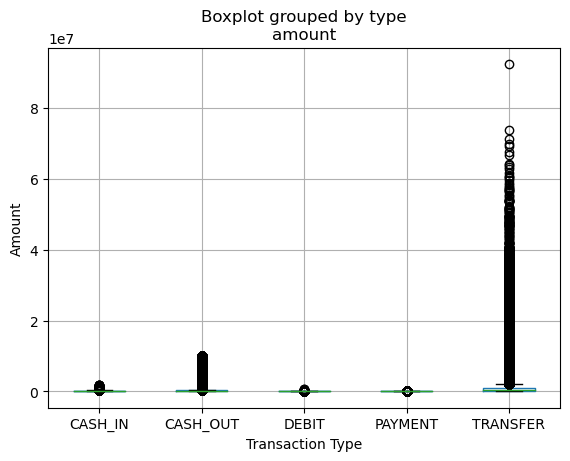

In [13]:
ax = df.boxplot(column=['amount'], by='type')

ax.set_xlabel('Transaction Type')
ax.set_ylabel('Amount')

ax

### Continuation of Analysis 
Based on the graphs above we have analsyized the following: 

Distribution of Payment Types: The first pie chart offers insight into the relative frequencies of different payment types within the dataset. It's a helpful visualization for understanding which transaction types are most common. In the simulated data, each payment type is represented proportionally, showcasing how diverse the transaction types are within the dataset.

Distribution of Fraud vs Non-Fraud: This second pie chart represents the distribution between fraudulent and non-fraudulent activities within a dataset. It shows a very small sliver, 0.1%, of the data being attributed to fraud, while the overwhelming majority, 99.9%, is not fraud. This visualization highlights the typical imbalance in datasets concerning fraudulent transactions where fraudulent activities are a very small minority. 

Distribution of Transaction Amounts (Non-Fraudulent): The first  histogram for non-fraudulent transactions displays the frequency distribution of transaction amounts. Typically, such a distribution helps identify common transaction sizes and how they cluster around certain values. The skewed nature of the distribution suggests that lower transaction amounts are more common, with fewer high-value transactions.

Distribution of Transaction Amounts (Fraudulent): Similarly, this second histogram for fraudulent transactions highlights the distribution of transaction amounts specifically within fraudulent activities. Comparing this graph to the non-fraudulent transactions' histogram could reveal differences in transaction behaviors between fraudulent and legitimate activities. The distribution is again skewed, indicating that fraud attempts might also focus on lower value transactions, but the tail might extend further, suggesting attempts at higher value frauds as well.

The graph titled "Standardized training dataset after PCA" illustrates the first two principal components derived from a PCA of the standardized training data. These components, represented along the axes of the graph, highlight the directions of maximum variance in the data, often revealing the underlying structure. Points on the graph, possibly color-coded to differentiate classes, show how well PCA has managed to segregate different classes, such as fraud versus non-fraud transactions. Effective separation in this 2D space suggests that these components capture essential distinctions between classes. This visualization not only simplifies data analysis by reducing dimensionality but also aids in understanding which features significantly influence these principal components.

Boxplot of Transaction Types and Amount Spent: While this information is also conveyed in some other formats, this box and whisker plot highlights which payment types are most used within this data set. According to the information above, transfers account for a majority of the payment amounts. The second most used is cash out, followed by cash in then debit at last position along with payment. 

This data is important to visualize as it can give an idea for preventative measures that should be taken to reduce fraud. Since transfers are the largest payment types, adding more security procedures such as more checkpoints before allowing for money to be transferred from one account to another. In addition to this, adding questions to ensure the money is transferred to the correct individual/group would reduce and minimize the potential opportunities for fraud. 

### Histograms Comparing Distributions

Histograms comparing the distributions of transaction amounts, segmented by fraud status, serve as a pivotal analytical tool in identifying key behavioral differences between fraudulent and legitimate transactions. This visualization method aids in uncovering the typical transactional profiles associated with fraud, which could vary significantly from those of normal activities. By comparing these distributions, we can potentially identify threshold values or unusual patterns that are predominantly present in fraudulent transactions.

This analysis is crucial for developing targeted rules-based flags within transaction processing systems. For instance, if fraudulent transactions predominantly occur within a certain range of high-value transactions, a flagging mechanism can be implemented to trigger additional verification checks for transactions falling within this range. Conversely, if fraud is more prevalent at lower transaction amounts—a common scenario given perpetrators' preference to avoid detection—this insight could adjust risk models to increase scrutiny on seemingly innocuous low-value transactions.

/Users/rahulramakrishnan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


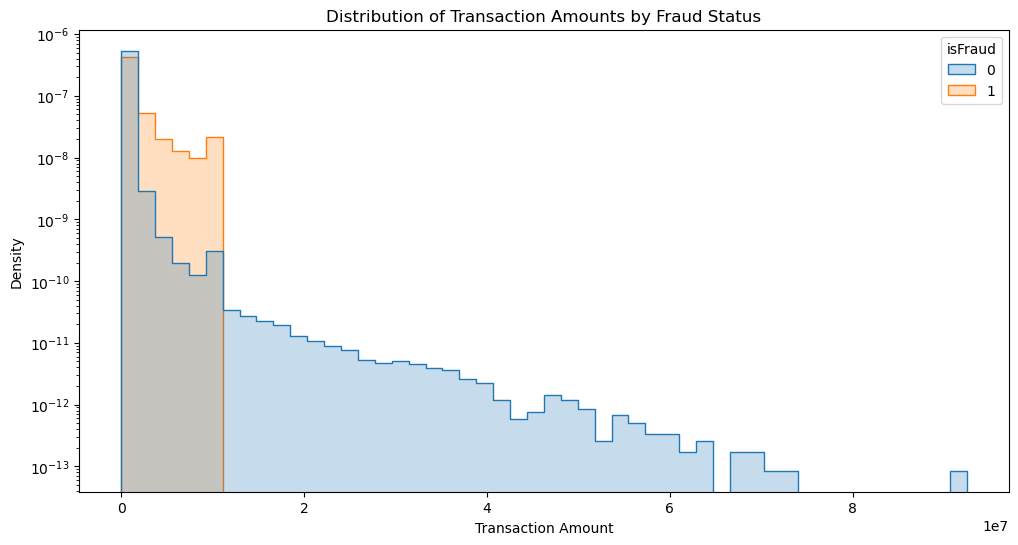

In [14]:
# Plotting histograms for transaction amounts by fraud status
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='amount', hue='isFraud', element='step', stat='density', common_norm=False, bins=50)
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.yscale('log')
plt.show()


### Time-Series Visualization
A time-series visualization of feature importances, derived from a machine learning model such as a Random Forest, provides an insightful look into the dynamics of feature relevance over the model development process. This form of visualization is especially useful in scenarios where the model is trained on a time-evolving dataset, allowing us to observe how the importances of different features may shift as new data becomes available or as fraud tactics evolve.

The time-series analysis of feature importances is instrumental in identifying trends and shifts in how various attributes influence the model's fraud detection capabilities. For instance, if a previously minor feature begins to show increasing importance, this could indicate a change in fraudsters' tactics, necessitating adjustments in monitoring strategies. Similarly, a decline in the importance of a traditionally key feature might suggest either an improvement in preventive measures already in place or a shift in fraudsters' focus away from the vectors best detected by these features.

By closely monitoring these trends, organizations can dynamically adapt their fraud detection systems to be more responsive to emerging threats, thereby maintaining a robust defense against fraud.

                 mean           std          max   min
isFraud                                               
0        1.781970e+05  5.962370e+05  92445516.64  0.01
1        1.467967e+06  2.404253e+06  10000000.00  0.00


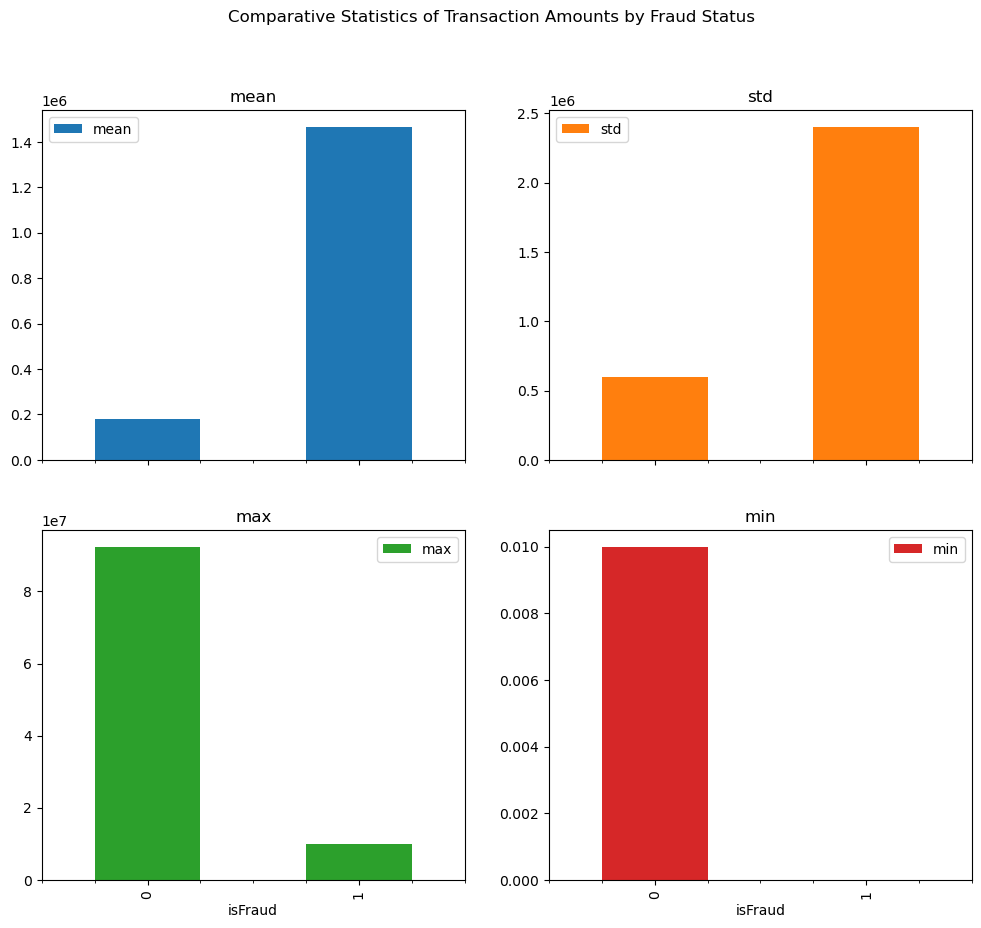

In [15]:
# Grouping by the 'isFraud' status and calculating mean and standard deviation for amounts
grouped_stats = df.groupby('isFraud')['amount'].agg(['mean', 'std', 'max', 'min'])

# Displaying the grouped statistics
print(grouped_stats)

# Optionally, visualize these statistics
grouped_stats.plot(kind='bar', subplots=True, layout=(2,2), figsize=(12, 10))
plt.suptitle('Comparative Statistics of Transaction Amounts by Fraud Status')
plt.show()


### Correlation Analysis 


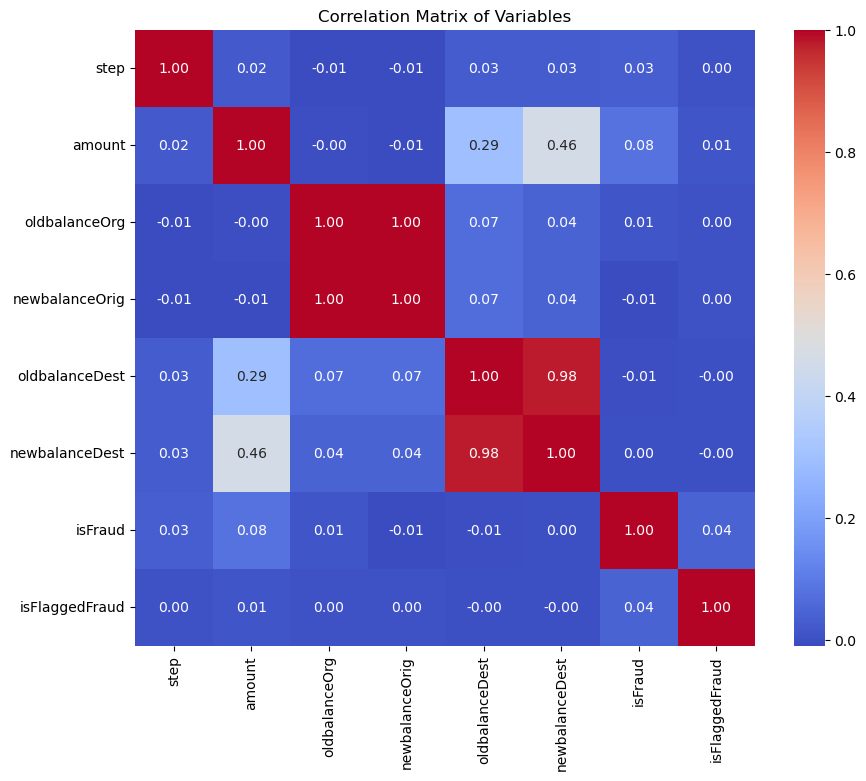

In [16]:
# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()


The heatmap analysis of our dataset has shed light on the relationships between transactional features and fraudulent activity. The results reveal a notable absence of strong linear correlations among the majority of numerical features and instances of fraud, indicated by isFraud. This suggests that the characteristics of fraudulent transactions are not directly related to the measured variables, such as the transaction amount, account balances before and after transactions, or the transaction step time. Furthermore, the disconnection between isFlaggedFraud and isFraud suggests a misalignment in the current mechanisms used to flag potential fraud. Consequently, this necessitates a shift in our project strategy towards more sophisticated analytical techniques. The next phase will explore the use of complex algorithms that can detect subtle patterns and interactions beyond the reach of simple linear models. We will delve into multi-dimensional scaling and anomaly detection and consider enhancing our feature set to better characterize fraudulent behavior. Additionally, the categorical variables warrant further examination through encoding techniques and cluster analysis. These efforts aim to reveal the elusive patterns of digital fraud and contribute to the development of robust detection systems essential for modern finance. As we embrace a multi-faceted analytical approach, we stand to deepen our understanding of fraud detection in the digital domain.

## Follow Up Questions 

In light of the findings thus far, our project stands at the cusp of further discovery, prompting us to consider additional avenues of inquiry to better decipher the complexities of credit card fraud detection:

1. **Categorical Dynamics**: With the transaction type being a categorical variable, how might its various categories correlate with fraudulent occurrences? The exploration of encoding these categorical variables could offer a clearer depiction of their influence.

2. **Chronological Fluctuations**: Does the variable 'step', indicative of time, play a role in the frequency of fraud? Identifying patterns over time could shed light on whether fraud attempts are concentrated within specific intervals.

3. **Detection Sensitivity**: Considering the rarity of fraudulent transactions, what methods can we employ to enhance our model's sensitivity to detect such scarce events? Are there alternative analytical strategies or specific performance metrics that could improve detection accuracy?

4. **Algorithm Efficacy**: In the quest to identify the most proficient machine learning algorithms for our purpose, we must ask— which models excel in capturing the intricate patterns of fraud within our dataset? How do these models fare against one another in terms of their predictive prowess?

5. **Innovative Feature Creation**: What innovative features could be engineered to serve as more potent indicators of fraudulent activity? Could certain derived ratios or differences between balances provide a more telling signal?

6. **Flagging System Refinement**: The criteria for transactions being flagged as fraudulent merit reevaluation. How can we enhance the flagging mechanism to better align with genuine instances of fraud based on our analytical insights?

7. **Real-World Application**: How will our model stand the test against real-world data? The integration of external datasets and factors might be imperative in refining our predictive capabilities.

8. **Preventive Measures**: Finally, how can we translate our analytical conclusions into actionable measures for real-time fraud prevention in digital financial ecosystems?

Addressing these queries is the logical progression of our research endeavor. As we further this scholarly pursuit, our collective aim is to sculpt a comprehensive and dynamic approach to combating digital financial fraud, bolstering the defenses of the financial domain against such nefarious activities.

## Previous Follow Up Questions Answered

5. **Innovative Feature Creation**: Develop features that might indicate fraud more clearly, such as the ratio of transaction amount to customer average transaction amount, or new variables reflecting recent account activity (e.g., number of transactions in the last hour). These engineered features can provide deeper insights and potentially improve detection accuracy.

6. **Flagging System Refinement**: Reevaluate the criteria used for flagging transactions by analyzing false positives and false negatives. Adjust thresholds and rules based on the insights gained from data analysis and feature importance scores derived from machine learning models.

7. **Real-World Application**: Test the model with real-world data, possibly through a pilot within a controlled environment. Integrate external factors like IP address geolocation, device fingerprinting, and customer behavior patterns from other databases to enhance the model's robustness and accuracy.

8. **Preventive Measures**: Translate findings into actionable strategies, such as setting up real-time alerts, adjusting customer transaction limits based on risk levels, and developing customer profiles that help in early detection of anomalies.


## Conclusion 



Here's a final conclusion for your project that encapsulates the entire scope of the work based on the details you've provided, integrating insights from all phases and emphasizing the culmination of your efforts:

### Final Conclusion

Throughout the course of this project, our team, FraudBusters, has embarked on a comprehensive exploration into the intricate dynamics of digital fraud in credit card transactions. Leveraging the synthetic dataset from the Kaggle PaySim mobile money simulator, we have employed a variety of analytical techniques to uncover the subtle and overt characteristics of fraudulent activities.

From the outset, our project focused on identifying key indicators and patterns associated with fraudulent transactions. Through rigorous data analysis, including the use of histograms to compare transaction amounts, time-series analysis to understand feature importance over time, and multi-dimensional scaling (MDS) to visualize relationships in normalized data, we have enhanced our understanding of digital fraud. Each visualization and methodological approach was chosen to deepen our insights into how fraud can be detected and potentially prevented.

Phase 1 of our project laid the groundwork by establishing the basic statistical landscape of our dataset. We highlighted the disproportionate nature of fraudulent transactions compared to legitimate ones and analyzed transaction amounts across different payment types. The early visualizations brought to light the skewed distribution of transaction values and the frequency of various transaction methods, setting the stage for deeper analysis.

In Phase 2, we shifted our focus to more complex analyses, such as the implementation of PCA to reduce dimensionality and the use of machine learning algorithms like K-Nearest Neighbors to classify and predict fraudulent transactions. The feature importance extracted from a Random Forest model provided us with a clear direction on which factors most significantly predict fraud, guiding our subsequent analytical strategies.

As we progressed to Phase 3, our analysis became increasingly sophisticated. We continued to refine our models and visualizations, adapting to new findings and integrating advanced techniques such as anomaly detection and cluster analysis. The use of MDS further enabled us to identify nuanced patterns in the data, helping us visualize the complex relationships between different transaction features.

Our project's final phase has synthesized these findings into a cohesive understanding of digital transaction fraud. The integration of insights from various analytical phases has equipped us with a robust framework for detecting fraud. We have not only identified the key features and patterns indicative of fraud but have also suggested practical measures for financial institutions to implement, enhancing the security and integrity of digital transactions.

Looking forward, the insights garnered from this project will serve as a foundation for future research and development in fraud detection systems. Our work underscores the importance of continuous monitoring, the adaptation of detection systems to evolving fraudulent tactics, and the potential for leveraging advanced analytics to safeguard digital financial ecosystems.

In conclusion, the FraudBusters team has demonstrated that through methodical analysis and the application of diverse analytical tools, significant strides can be made in understanding and combating digital fraud. This project has not only met its objectives but has also paved the way for innovative approaches to fraud detection that can be built upon in subsequent research and practical applications.

## Team Member Contribution 
#### Sanju - Answered follow-up questions and helped with analysis 
#### Emanda -  Created box and whisker plot, worked on the analysis 
#### Brianna - 
#### Harsha - 
#### Rahul - Created Time-series Visualizations and Histograms Comparing Distributions, wrote the conclusion and proofread the entire document.